# Analytical solution for a cantilever beam with a single load at the end

© 2023 Daniel F. Ruiz, Exneyder A. Montoya-Araque and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_solid_mechanics/blob/main/notebooks/beam_analytic_sol.ipynb).

> Note: Be aware that this notebook follows solid mechanics sign conventions → Tractions are positive, compressions are negative, and shear forces/stresses are positive when they act on the positive $x$-plane and point to the positive $y$-direction.


## Required modules and global setup for plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sym
from IPython import get_ipython

if 'google.colab' in str(get_ipython()):
    %pip install ipympl &> ~/pip-log.txt
    from google.colab import output
    output.enable_custom_widget_manager()

%matplotlib widget
plt.style.use("default")
mpl.rcParams.update(
    {
        # 'figure.dpi': 300,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
sym.init_printing(use_unicode=True)

## Functions

In [2]:
def beam_stress_fields(x, y, load, h, l):
    b = 1
    moi = b * h**3 / 12  # Moment of inertia
    # Stress field
    𝜎_xx = - x * y * load / moi
    𝜎_yy, 𝜎_zz, 𝜏_xz = 0*𝜎_xx, 0*𝜎_xx, 0*𝜎_xx
    𝜏_xy = -(h ** 2 / 4 - y**2) * load / (2 * moi)
    𝜏_yx = 𝜏_xy
    #Principal stresses
    𝜎_m = (𝜎_xx + 𝜎_yy) / 2
    𝜏_max = np.sqrt(((𝜎_xx - 𝜎_yy) / 2) ** 2 + 𝜏_xy ** 2)
    𝜎_1 = 𝜎_m + 𝜏_max
    𝜎_3 = 𝜎_m - 𝜏_max
    return 𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max

def plot_field(x, y, fields, **kwargs):
    figsize = kwargs.get('figsize', [8, 5])
    # Figure
    fields = fields if isinstance(fields, list) else [fields]
    titles = kwargs.get('titles')
    if titles is None:
        titles = [f'Field {i}' for i in range(len(fields))]
    else:
        titles = titles if isinstance(titles, list) else [titles]
    fig, axs = plt.subplots(ncols=1, nrows=len(fields), figsize=figsize)
    axs = axs if len(fields)>1 else [axs]
    for ax, field, title in zip(axs, fields, titles):
        im = ax.contourf(x, y, field, cmap="RdYlBu_r")
        ax.axis('image')
        ax.set_title(title)
        fig.colorbar(im, ax=ax, shrink=0.7)
    plt.show()

## Global inputs

In [3]:
# Input data
load = 1
h = 1
l = 5

## Showing the tensor at one point

In [4]:
x, y = 5, 0.3

stress_fields = beam_stress_fields(x, y, load, h, l)
𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max = np.round(stress_fields, 2)
𝜎 = sym.Matrix([[𝜎_xx, 𝜏_xy], [𝜏_xy, 𝜎_yy]])
𝜎_eig = sym.Matrix([[𝜎_1, 0], [0, 𝜎_3]])
print('(𝜎, 𝜎_eig) =')
𝜎, 𝜎_eig

(𝜎, 𝜎_eig) =


⎛⎡-18.0  -0.96⎤  ⎡0.05    0   ⎤⎞
⎜⎢            ⎥, ⎢            ⎥⎟
⎝⎣-0.96    0  ⎦  ⎣ 0    -18.05⎦⎠

## Plotting the fields

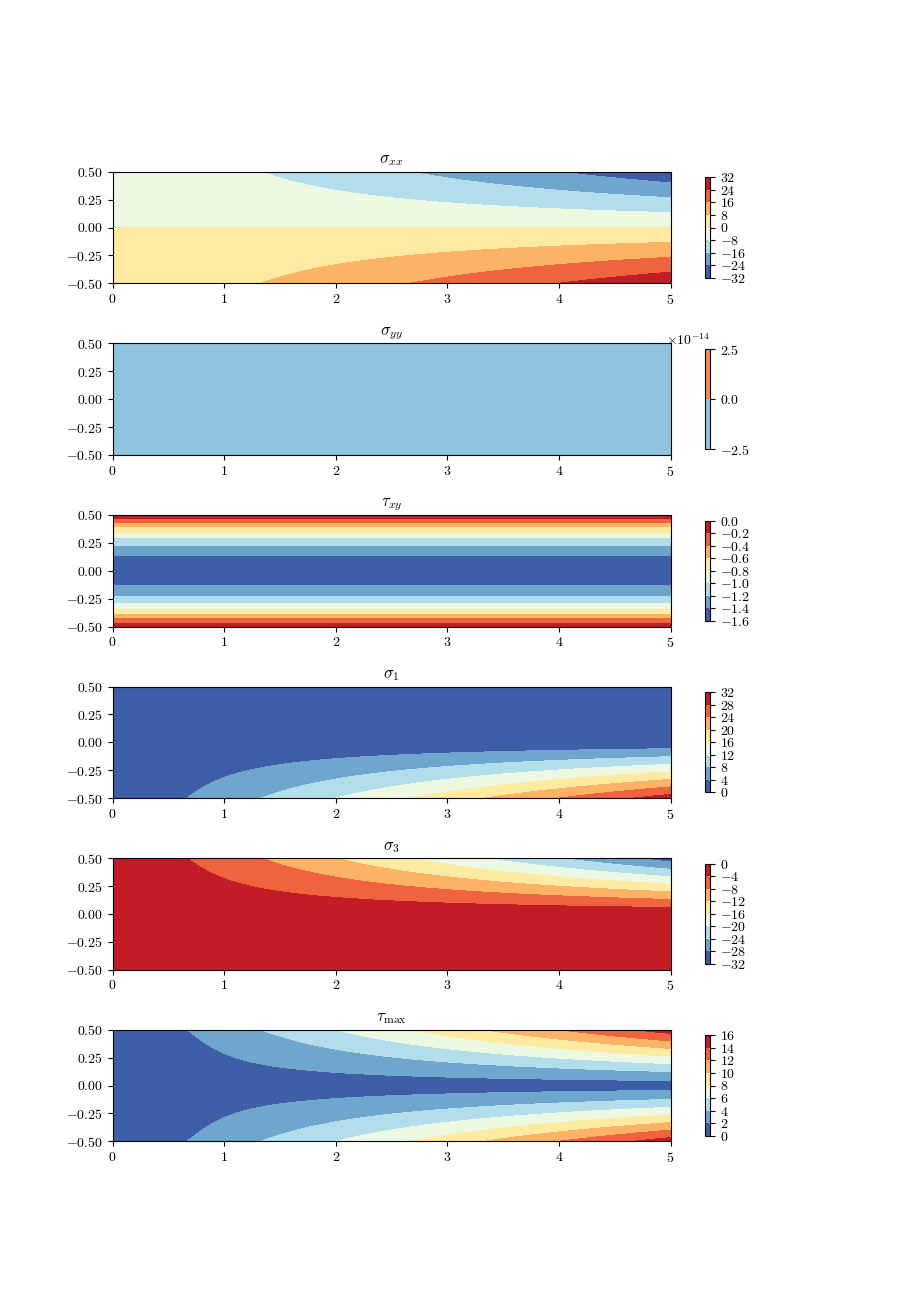

In [8]:
# Nodes
xx , yy = np.meshgrid(np.linspace(0 , l , 100), np.linspace(-0.5*h, 0.5*h, 100))

# Solver
𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜎_m, 𝜏_max = beam_stress_fields(xx , yy, load, h, l)

# Visualization
titles = ["$\sigma_{xx}$", "$\sigma_{yy}$", "$\\tau_{xy}$", "$\sigma_{1}$", "$\sigma_{3}$", "$\\tau_\mathrm{max}$"]
plot_field(xx , yy, [𝜎_xx , 𝜎_yy , 𝜏_xy , 𝜎_1 , 𝜎_3 , 𝜏_max], titles=titles, figsize=[9, 13])